# Get Data from files and help to make a breastcancer diagnosis

This litte coding example will show you the basics of data science with python.
First we will add imports we need to import, shape and display our data:

We will import [**numpy**](http://www.numpy.org/), [**Pandas**](https://pandas.pydata.org/)  and [**matplotlib**](https://matplotlib.org). With this libaries we will be able to handle arrays, load data into our project, shape them to the state we need and plot graphics helping us to understand what this numbers mean basically.

Ok let us import this libaries

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 

#### Load the dataset

Next step will be to load a dataset this dataset is from https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/. 
This page is offering a lot of datasets for training or playing with it and learning data science and machine learning.

In [2]:
Cov = pd.read_csv("breast-cancer.csv", delimiter=',')

#### Check the Dataset

It seems that there is no headline in the dataset, so there are missing important information. We have to go to the [**site**](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer) we loaded the Dataset and get the headline from the documentation how it looks like this moment.

1. Class: no-recurrence-events, recurrence-events 
2. age: 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99. 
3. menopause: lt40, ge40, premeno. 
4. tumor-size: 0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59. 
5. inv-nodes: 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26, 27-29, 30-32, 33-35, 36-39. 
6. node-caps: yes, no. 
7. deg-malig: 1, 2, 3. 
8. breast: left, right. 
9. breast-quad: left-up, left-low, right-up, right-low, central. 
10. irradiat: yes, no.

So now lets add this headline to our dataset:

In [3]:
Frame=pd.DataFrame(Cov.values, columns = ["class","age","menopause", "tumor-size","inv-nodes","node-caps","deg-malig","breast","breast-quad","irradiat"])


#### Generate csv with corrected Data

In [4]:
Frame.to_csv("breast-cancer-head-line.csv", sep=',')
df = pd.read_csv("breast-cancer-head-line.csv", delimiter=',', index_col=0)

#### Generate an exel from the Data to offer this to 'non developer'

In [5]:
df.to_excel("breast-cancer-head-line.xls", sheet_name="data")

#### Get first entries for our data

In [6]:
df.head(5)

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


#### Get an first overview about the Data

In [7]:
df.shape

(285, 10)

In [8]:
df.describe()

,deg-malig
count,285.000000
mean,2.045614
std,0.737351
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


## matplotlib

Now we start to use matplotlib. The idea is to give our data informative graphics to understand it better. First we need to konfigurate the shape of our graphics as well as the size and colour.


In [9]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16.0, 8.0)

#### First Figure 

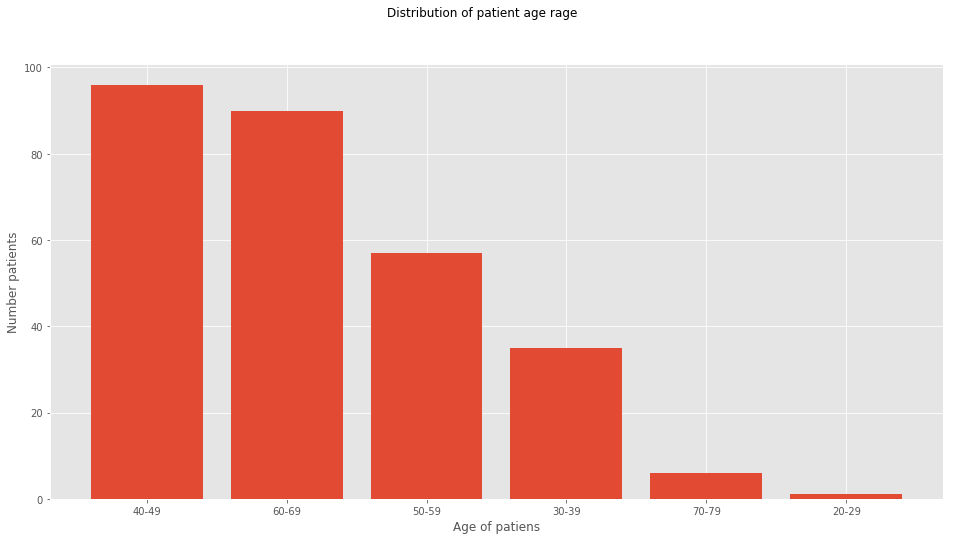

In [10]:
plt.bar(x=df.age.unique(), height=df.age.value_counts())
plt.xlabel('Age of patiens')
plt.ylabel('Number patients')
plt.suptitle('Distribution of patient age rage');

#### Shaping datasets for plotting it

Before we could start with displaying the data in different plots, we have to change it to a numeric writing. Because string is not supported by matplotlib diagramms.

1. Class: no-recurrence-events = **0**, recurrence-events = **1** 

2. age: 10-19 = **10**, 20-29 = **20**, 30-39 = **30**, 40-49 = **40**, 50-59 = **50**, 60-69 = **60**, 70-79 = **70**, 80-89 = **80**, 90-99 = **90**.

3. menopause: lt40 = **0**, ge40 = **1**, premeno = **2**. 

4. tumor-size: 0-4 = **0**, 5-9 = **5**, 10-14 = **10**, 15-19 = **15**, 20-24 = **20**, 25-29 = **25**, 30-34 = **30**, 35-39 = **35**, 40-44 = **40**, 45-49 = **45**, 50-54 = **50**, 55-59 = **55**.

5. inv-nodes: 0-2 = **0**, 3-5 = **3**, 6-8 = **6**, 9-11 = **9**, 12-14 = **12**, 15-17 = **15**, 18-20 = **18**, 21-23 = **21**, 24-26 = **24**, 27-29 = **27**, 30-32 = **30**, 33-35 = **33**, 36-39 = **36**. 

6. node-caps: yes = **1**, no = **0**. 

7. deg-malig: 1, 2, 3. 

8. breast: left = **0**, right = **1**. 

9. breast-quad: left-up = **0**, left-low = **1**, right-up = **2**, right-low = **3**, central = **4**. 

10. irradiat: yes = **1**, no = **0**.

Legend: lt40 means menopause before 40 years old
ge40 means menopause after 40


In [11]:
#Change class
#df['class'] = df['class'].map({'recurrence-events': 1, 'no-recurrence-events': 0})
#Change Age 
df['age'] = df['age'].map({'10-19': 10, '20-29': 20, '30-39': 30, '40-49': 40, '50-59': 50, '60-69': 60, '70-79': 70, '80-89': 80, '90-99': 90})
#Change Menopause
#df['menopause'] = df['menopause'].map({'lt40': 0, 'ge40': 1, 'premeno': 2})
#Change Tumor Size
df['tumor-size'] = df['tumor-size'].map({'0-4': 0, '5-9': 5, '10-14': 10, '15-19': 15, '20-24': 20, '25-29': 25, '30-34': 30, '35-39': 35, '40-44': 40, '45-49': 45, '50-54': 50, '55-59': 55})
#Change inv-nodes
#df['inv-nodes'] = df['inv-nodes'].map({'0-2': 0, '3-5': 3, '6-8': 6, '9-11': 9, '12-14': 12, '15-17': 15, '18-20': 18, '21-23': 21, '24-26': 24, '27-29': 27, '30-32': 30, '33-35': 33, '36-39': 36})
#Change node-caps
#df['node-caps'] = df['node-caps'].map({'yes': 1, 'no': 0})
#Change breast
#df['breast'] = df['breast'].map({'right': 1, 'left': 0})
#change breast-quad
#df['breast-quad'] = df['breast-quad'].map({'left-up': 0, 'left-low': 1, 'right-up': 2, 'right-low': 3, 'central': 4})
#change irradiat
#df['irradiat'] = df['irradiat'].map({'yes': 1, 'no': 0})
df.dtypes
df.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,40,premeno,20,0-2,no,2,right,right_up,no
1,no-recurrence-events,40,premeno,20,0-2,no,2,left,left_low,no
2,no-recurrence-events,60,ge40,15,0-2,no,2,right,left_up,no
3,no-recurrence-events,40,premeno,0,0-2,no,2,right,right_low,no
4,no-recurrence-events,60,ge40,15,0-2,no,2,left,left_low,no


In [37]:
df.dtypes

class          object
age             int64
menopause       int64
tumor-size      int64
inv-nodes      object
node-caps      object
deg-malig       int64
breast         object
breast-quad    object
irradiat       object
dtype: object

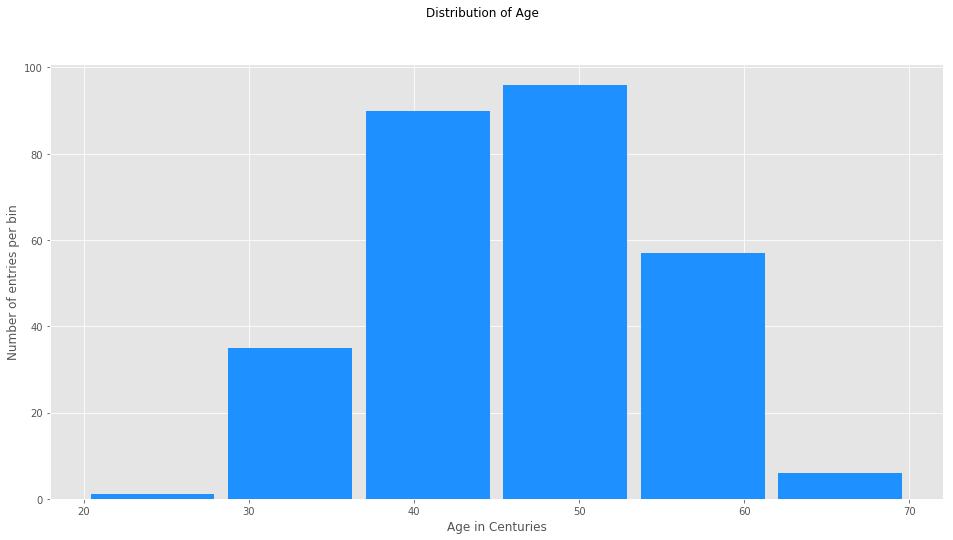

In [12]:
plt.suptitle("Distribution of Age")
plt.hist(df['age'], 
         bins=6, 
         rwidth=0.9, 
         density = False, 
         color='dodgerblue')
plt.xlabel('Age in Centuries')
plt.ylabel('Number of entries per bin');

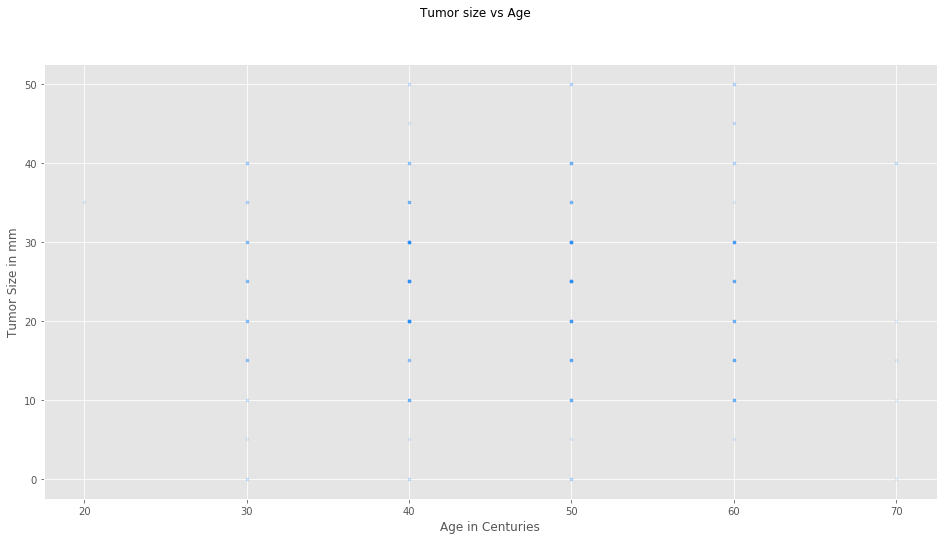

In [33]:
plt.suptitle("Tumor size vs Age")
plt.scatter(x=df[df['tumor-size'] < 90]['age'], 
            y=df[df['tumor-size'] < 70]['tumor-size'], 
            marker='.', 
            alpha=0.1, 
            color='dodgerblue')
plt.xlabel('Age in Centuries')
plt.ylabel('Tumor Size in mm');

#### Information from a different display

Lets have a look if we can get more information if we use a heat map instead of a scatter plot. Let us do a heatmap. If the heatmap is done, I would like the answer for the following questions:

Do you think there are usefull information we could use for machine learning Training ?

Do you think there is somehow a "risk group" ?

If there is a risk group, how would you think could it be described?

What would you recommend when precautionary investigation be more intense?

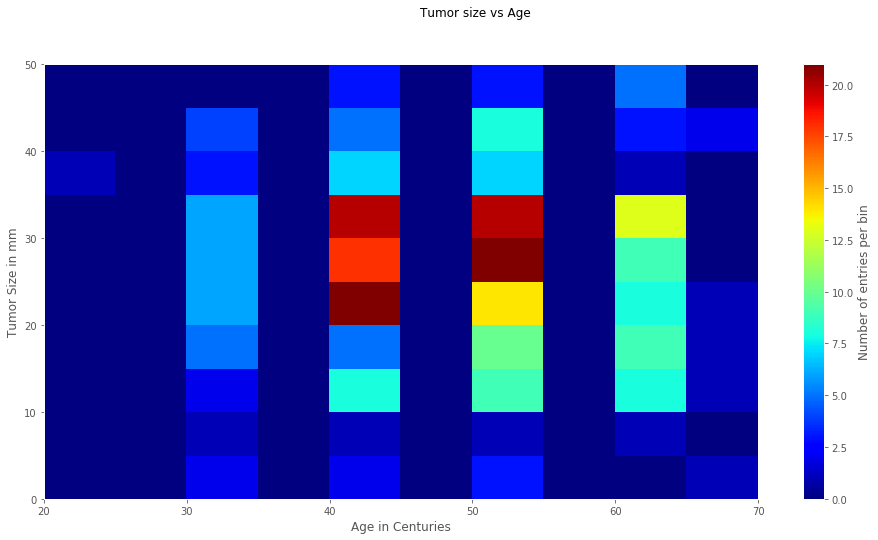

In [34]:
plt.suptitle("Tumor size vs Age")
plt.hist2d(x=df[df['tumor-size'] < 60]['age'], 
           y=df[df['tumor-size'] < 70]['tumor-size'], 
           bins=10, 
           cmap=mpl.cm.jet)
plt.xlabel('Age in Centuries')
plt.ylabel('Tumor Size in mm');
cb = plt.colorbar()
cb.set_label('Number of entries per bin')

In [38]:
df.dtypes

class          object
age             int64
menopause       int64
tumor-size      int64
inv-nodes      object
node-caps      object
deg-malig       int64
breast         object
breast-quad    object
irradiat       object
dtype: object

#### Find additional information:

We now have found out an information wich seems obvious. But with the knowledge we gained, we can use other parameters to let them correlate as well.

In [15]:
#Change Menopause
df['menopause'] = df['menopause'].map({'lt40': 0, 'ge40': 1, 'premeno': 2})
df.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,40,2,20,0-2,no,2,right,right_up,no
1,no-recurrence-events,40,2,20,0-2,no,2,left,left_low,no
2,no-recurrence-events,60,1,15,0-2,no,2,right,left_up,no
3,no-recurrence-events,40,2,0,0-2,no,2,right,right_low,no
4,no-recurrence-events,60,1,15,0-2,no,2,left,left_low,no


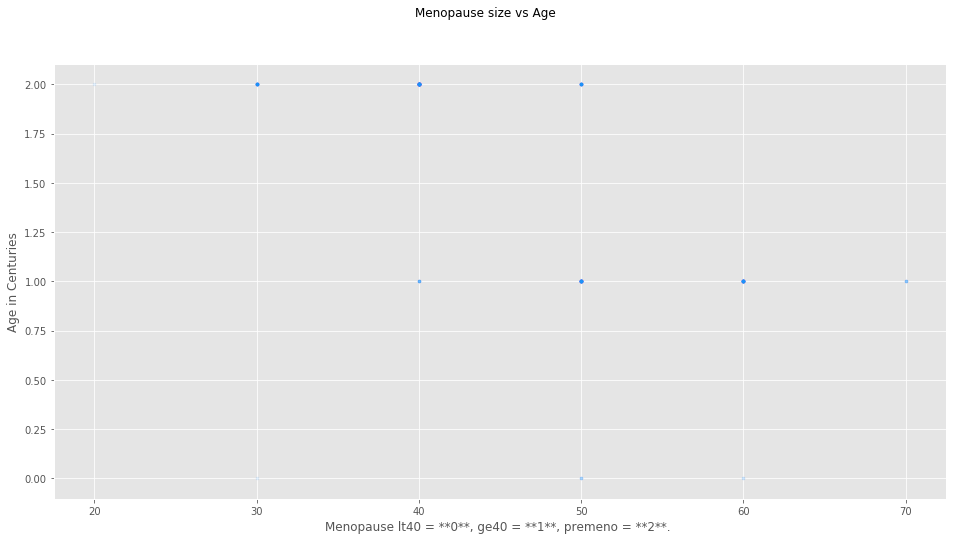

In [16]:
plt.suptitle("Menopause size vs Age")
plt.scatter(x=df[df['menopause'] < 3]['age'], 
            y=df[df['menopause'] < 3]['menopause'], 
            marker='.', 
            alpha=0.1, 
            color='dodgerblue')
plt.xlabel('Menopause lt40 = **0**, ge40 = **1**, premeno = **2**. ')
plt.ylabel('Age in Centuries');

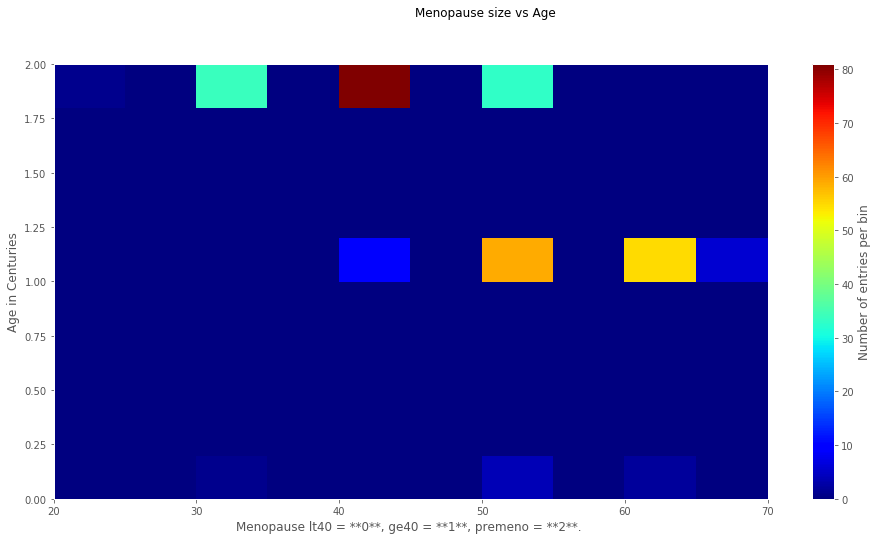

In [20]:
plt.suptitle("Menopause size vs Age")
plt.hist2d(x=df[df['menopause'] < 90]['age'], 
           y=df[df['menopause'] < 3]['menopause'], 
           bins=10, 
           cmap=mpl.cm.jet)
plt.xlabel('Menopause lt40 = **0**, ge40 = **1**, premeno = **2**. ')
plt.ylabel('Age in Centuries');
cb = plt.colorbar()
cb.set_label('Number of entries per bin')

#### Eveluation information

Does this grafic give us any usefull (cancer relatet) information?

If yes what kind ? If no why?

#### Different approach

